In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run 'req_analysis/neptune-util.py'
%env NEPTUNE_CLUSTER_ENDPOINT=ec2-18-224-170-154.us-east-2.compute.amazonaws.com
%env NEPTUNE_CLUSTER_PORT=8182
g = neptune.graphTraversal()

env: NEPTUNE_CLUSTER_ENDPOINT=ec2-18-224-170-154.us-east-2.compute.amazonaws.com
env: NEPTUNE_CLUSTER_PORT=8182
gremlin: ws://ec2-18-224-170-154.us-east-2.compute.amazonaws.com:8182/gremlin


In [3]:
import random

In [4]:
from paris import paris
from paris.utils import *

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
import time

from req_analysis import Requirement

In [7]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("http://ec2-18-224-170-154.us-east-2.compute.amazonaws.com:3001/sparql")

In [8]:
queryString = """prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix owl: <http://www.w3.org/2002/07/owl#>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>
prefix xml: <http://www.w3.org/XML/1998/namespace/>
prefix mms-ontology: <https://opencae.jpl.nasa.gov/mms/rdf/ontology/>
prefix mms-graph: <https://opencae.jpl.nasa.gov/mms/rdf/graph/>
prefix mms-property: <https://opencae.jpl.nasa.gov/mms/rdf/property/>
prefix mms-class: <https://opencae.jpl.nasa.gov/mms/rdf/class/>
prefix mms-element: <https://opencae.jpl.nasa.gov/mms/rdf/element/>
prefix mms-artifact: <https://opencae.jpl.nasa.gov/mms/rdf/artifact/>
prefix mms-index: <https://opencae.jpl.nasa.gov/mms/rdf/index/>
prefix xmi: <http://www.omg.org/spec/XMI/20131001#>
prefix uml: <http://www.omg.org/spec/UML/20161101#>
prefix uml-model: <https://www.omg.org/spec/UML/20161101/UML.xmi#>
prefix uml-primitives: <https://www.omg.org/spec/UML/20161101/PrimitiveTypes.xmi#>
prefix uml-class: <https://opencae.jpl.nasa.gov/mms/rdf/uml-class/>
prefix uml-property: <https://opencae.jpl.nasa.gov/mms/rdf/uml-property/>

select * from mms-graph:data.tmt {
    ?subject ?edge ?str .

    values ?edge {
        mms-property:bodyStringFromComment
        mms-property:valueString
    }
    
    filter(isLiteral(?str) && ?str != "")
}
"""

In [9]:
queryElements = """prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix owl: <http://www.w3.org/2002/07/owl#>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>
prefix xml: <http://www.w3.org/XML/1998/namespace/>
prefix mms-ontology: <https://opencae.jpl.nasa.gov/mms/rdf/ontology/>
prefix mms-graph: <https://opencae.jpl.nasa.gov/mms/rdf/graph/>
prefix mms-property: <https://opencae.jpl.nasa.gov/mms/rdf/property/>
prefix mms-class: <https://opencae.jpl.nasa.gov/mms/rdf/class/>
prefix mms-element: <https://opencae.jpl.nasa.gov/mms/rdf/element/>
prefix mms-artifact: <https://opencae.jpl.nasa.gov/mms/rdf/artifact/>
prefix mms-index: <https://opencae.jpl.nasa.gov/mms/rdf/index/>
prefix xmi: <http://www.omg.org/spec/XMI/20131001#>
prefix uml: <http://www.omg.org/spec/UML/20161101#>
prefix uml-model: <https://www.omg.org/spec/UML/20161101/UML.xmi#>
prefix uml-primitives: <https://www.omg.org/spec/UML/20161101/PrimitiveTypes.xmi#>
prefix uml-class: <https://opencae.jpl.nasa.gov/mms/rdf/uml-class/>
prefix uml-property: <https://opencae.jpl.nasa.gov/mms/rdf/uml-property/>

select * from mms-graph:data.tmt {
    ?element a/rdfs:subClassOf* uml-class:Class
    {
        ?element rdfs:label ?label 
    } union {
        ?element mms-property:name ?label
    }
    
    filter(isLiteral(?label) && ?label != "")
}
"""

In [10]:
sparql.setQuery(queryElements)

sparql.setReturnFormat(JSON)
el_results = sparql.query().convert()

In [11]:
model_elements = []
for result in el_results["results"]["bindings"]:
#     print(result['element']['value'], result['label']['value'])
    model_elements.append(dict(uri=result['element']['value'], name=result['label']['value']))

In [12]:
sparql.setQuery(queryString)

sparql.setReturnFormat(JSON)
results = sparql.query().convert()



## Gremlin queries:
g.V('_16785_7fb36acc-eea1-4ebd-adb5-646dabb347e5').valueMap(True).toList()[0] \
keys: T.id, T.label, '_label'

In [13]:
summit='_4663af6e-6265-438d-87b8-74e1550518bf__65_6314a138-53b9-42a5-b488-9c23967ed889'
enclosure='_18_0_6_f1d0357_1490143302007_461579_179266'
mirror='_18_5_2_e64033a_1509475358071_810923_58742'
aps_user='_17_0_2_3_41e01aa_1389730769202_855584_72742'
aps_mission='_17_0_2_3_41e01aa_1389728637481_651557_61606'

In [13]:
for result in results["results"]["bindings"][700:2000]:
    if str.startswith(result["str"]["value"], "<html>"):
            req_object = Requirement(result["subject"]["value"], result["str"]["value"])
            matches = req_object.match_req_tokens(model_elements, 0.020)
            if len(matches)>3 and len(matches)<5:
                print('Req ID: ', result["subject"]["value"], '\nReq text:' , (result["str"]["value"]))
                print(matches, '\n___________')
                break

Req ID:  https://opencae.jpl.nasa.gov/mms/rdf/element/_4663af6e-6265-438d-87b8-74e1550518bf__1015_e548608e-442a-4e4e-916c-f5c6dba77d99_asi-slot-_17_0_2_3_b4c02e1_1379368975825_138301_38788-slotvalue-0-literalstring 
Req text: <html><body>
<span xmlns="http://www.w3.org/1999/xhtml"><br/>(CCR24) Transponder based system added to improve reliability of detection.<br/>All sky cameras will patrol a large area around the observatory to ensure lasers are shut down before possible illumination of aircraft. Bore sighted camera field of view is immediately around projected laser beam</span></body></html>
[{'token': {'text': 'reliability', 'pos': 'NOUN', 'token_id': 13}, 'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_8f7cabc1-8e5f-4014-8c9c-7ff7b8b98955__1747_c620c165-5139-4454-bab8-c5404a31995a', 'name': 'Reliability'}, 'score': 1.998401444325281e-17}, {'token': {'text': 'reliability', 'pos': 'NOUN', 'token_id': 13}, 'model_element': {'uri': 'https://opencae.jpl.nasa.gov

In [15]:
g = neptune.graphTraversal()
g.V('_18_5_3_e64033a_1517517345905_946202_22722').repeat(both().not_(hasId('master')).simplePath()).until(hasId('_4663af6e-6265-438d-87b8-74e1550518bf__10_a7ad0d07-fa64-40e7-a266-db3006b20dc5').or_().loops().is_(3)).path().limit(1).toList()

gremlin: ws://ec2-18-224-170-154.us-east-2.compute.amazonaws.com:8182/gremlin


[path[v[_18_5_3_e64033a_1517517345905_946202_22722], v[_18_5_3_e64033a_1517510196013_706005_18460], v[_18_0_5_c0402fd_1468273748052_698417_176773], v[_18_0_5_baa02e2_1457915731686_994645_149330]]]

In [14]:
g = neptune.graphTraversal()
req_object.init_match_subgraph(g)

gremlin: ws://ec2-18-224-170-154.us-east-2.compute.amazonaws.com:8182/gremlin
0 1
{'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_8f7cabc1-8e5f-4014-8c9c-7ff7b8b98955__1747_c620c165-5139-4454-bab8-c5404a31995a', 'name': 'Reliability'} {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_874_ed04f23b-a8b1-4fc2-b57f-d11fecfbcaf7', 'name': 'Reliability'}

SUCCESS in  0.4347419738769531 s  3
_________
0 2
{'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_8f7cabc1-8e5f-4014-8c9c-7ff7b8b98955__1747_c620c165-5139-4454-bab8-c5404a31995a', 'name': 'Reliability'} {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_18_0_5_f1d0357_1463003441807_271913_148584', 'name': 'Laser'}
FAILURE in  10.074721097946167 s:  
_________
0 3
{'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_8f7cabc1-8e5f-4014-8c9c-7ff7b8b98955__1747_c620c165-5139-4454-bab8-c5404a31995a', 'name': 'Reliability'} {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_18_0_5_f1d0357_1463003441807_271913_148584',

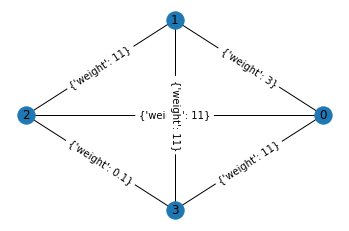

In [17]:
pos = nx.circular_layout(req_object.req_subgraph)
nx.draw_networkx_edge_labels(req_object.req_subgraph, pos)
nx.draw_circular(req_object.req_subgraph, with_labels=True)

In [18]:
import scipy

In [19]:
dist_matrix = nx.to_numpy_matrix(req_object.req_subgraph)

In [20]:
import scipy.spatial.distance as ssd
# convert the redundant n*n square matrix form into a condensed nC2 array
dist_array = ssd.squareform(dist_matrix) # distArray[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i a

In [27]:
linkage_ = scipy.cluster.hierarchy.linkage(dist_array, method='single', metric='euclidean')

In [110]:
req_object.match_clustering()

[[1.         0.         0.36288297 2.        ]
 [3.         2.         0.38573581 2.        ]
 [5.         4.         1.50276243 4.        ]]
4
[[1, 0], [2], [3]] [[1, 0], [3, 2]]


[[1, 0], [2], [3]]

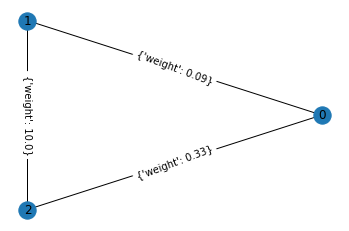

In [55]:
G2 = nx.Graph()
G2.add_node(0)
G2.add_node(1)
G2.add_node(2)
G2.add_edge(0,1, weight=0.09)
G2.add_edge(0,2, weight=0.33)
G2.add_edge(1,2, weight=10.0)

pos = nx.circular_layout(G2)
nx.draw_networkx_edge_labels(G2, pos)
nx.draw_circular(G2, with_labels=True)

In [76]:
select_clustering(paris.paris(G), 1)

[[1, 0], [2], [3]]

In [107]:
G.number_of_nodes()

4

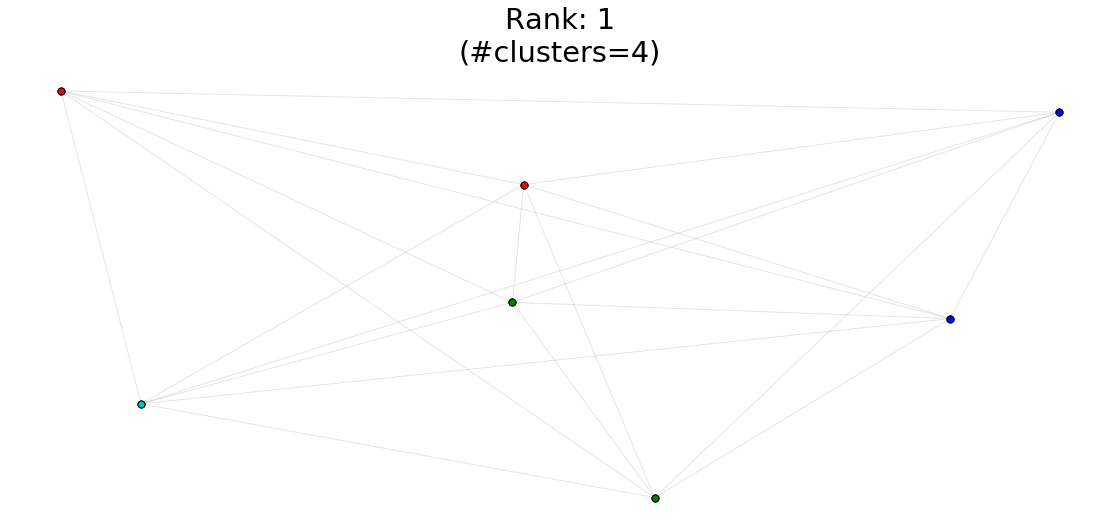

In [86]:
pos = nx.spring_layout(G)
plot_best_clusterings(G, D, 1, pos)

In [57]:
import spacy

nlp_np = spacy.load("en_core_web_sm")
merge_nps = nlp_np.create_pipe("merge_noun_chunks")
nlp_np.add_pipe(merge_nps)


In [69]:
for t in nlp_np("Hello my name is the beautiful car of New York. Bye!"):
    print(t.text, t.pos_, t.idx)

Hello INTJ 0
my name NOUN 6
is AUX 14
the beautiful car NOUN 17
of ADP 35
New York PROPN 38
. PUNCT 46
Bye INTJ 48
! PUNCT 51
